In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

from skimage import measure, color
plt.rcParams['image.cmap'] = 'gray'

show_all = True

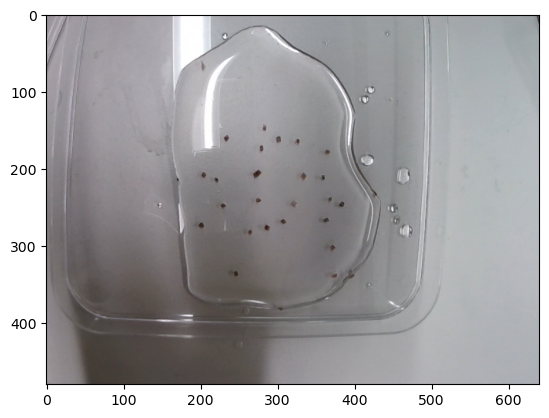

In [2]:
image = cv2.imread('Pictures/image5.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
if show_all:
    plt.imshow(image)

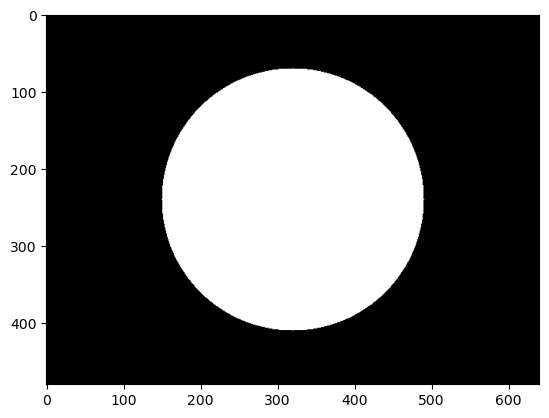

In [3]:
mask = np.zeros(image.shape[0:2], dtype='uint8')

center_coordinates = (int(mask.shape[1]/2), int(mask.shape[0]/2))
radius = 170
color = 255
thickness = -1

mask = cv2.circle(mask, center_coordinates, radius, color, thickness)
            
if show_all:
    plt.imshow(mask)

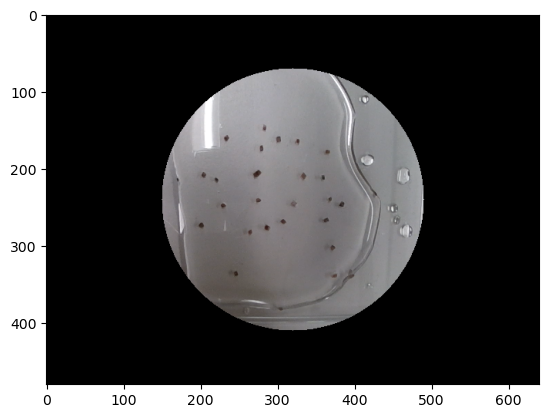

In [4]:
zoi = cv2.bitwise_and(image, image, mask=mask)
if show_all:
    plt.imshow(zoi)

In [46]:
area = cv2.selectROI('Area', image)
template = image[area[1]:area[1] + area[3], area[0]:area[0] + area[2]]
cv2.imwrite('Pictures/Tissue_template.png', template)
cv2.destroyAllWindows()

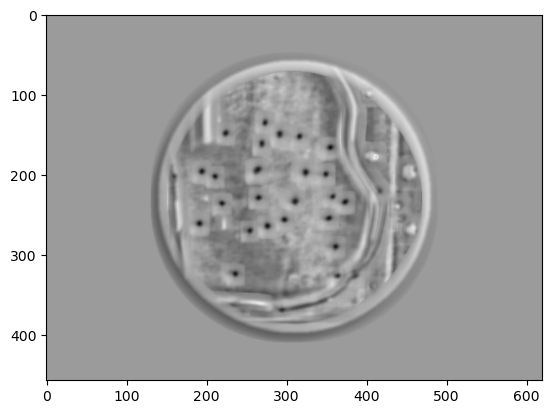

In [47]:
template = cv2.imread('Pictures/Tissue_template.png')
c, w, h = template.shape[::-1]
# goal_pos = [top_left_goal[0] + w / 2, top_left_goal[1] + h / 2]

results = cv2.matchTemplate(zoi, template, cv2.TM_CCOEFF_NORMED)
res_max = np.max(results); res_min = np.min(results)
results = np.uint8(256-((results-res_min)/(res_max-res_min)*255))

if show_all:
    plt.imshow(results)

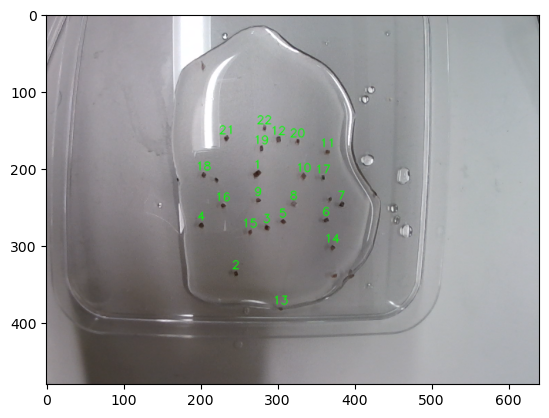

In [55]:

out = image.copy()

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 100


# Filter by Area.
params.filterByArea = True
params.minArea = 30
params.maxArea = 60

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Create a detector with the parameters
# OLD: detector = cv2.SimpleBlobDetector(params)
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(results)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

# im_with_keypoints = cv2.drawKeypoints(gray_image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.5
color = (0, 255, 0)
thickness = 1

for i in range(len(keypoints)):
        size, _ = cv2.getTextSize(str(i+1), font, fontScale, thickness)
        out = cv2.putText(out, str(i+1), (int(keypoints[i].pt[0]-size[0]/2+w/2),int(keypoints[i].pt[1]-5+h/2)), font, 
                   fontScale, color, thickness, cv2.LINE_AA)
# Show blobs
plt.imshow(out)

# Results

Good overal results, very few false positive, but hard to discriminate by size